# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study_df= pd.merge(mouse_metadata,study_results, on=["Mouse ID"])

# Display the data table for preview
combined_mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [92]:
# Checking the number of mice.
# [len(Mouse_metadata["Mouse ID"])] also works to get the 249 unique ID's from Mice, In this case we used the results which states the mice multiple times, that's why we use 'unique'
mice_count=[len(combined_mouse_study_df['Mouse ID'].unique())]
mice_count

[249]

In [93]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#XPERT Learning Assistant aid
#.duplicated finds all duplicates based on column named, keep=False marks them as True
duplicate_mice= combined_mouse_study_df[combined_mouse_study_df.duplicated(["Mouse ID", "Timepoint"], keep=False)]['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [94]:
# Optional: Get all the data for the duplicate mouse ID. 
#code looking at "Mouse ID" column filtering to "g989" and returns all columns
duplicate_data= combined_mouse_study_df.loc[combined_mouse_study_df["Mouse ID"]=="g989",:]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse= "g989"
cleaned_results_df= combined_mouse_study_df[combined_mouse_study_df["Mouse ID"] != duplicate_mouse]
cleaned_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [96]:
# Checking the number of mice in the clean DataFrame.
cleaned_results_count= len(cleaned_results_df ["Mouse ID"].unique())
cleaned_results_count

248

## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
 #df.groupby('YourColumn')[['NumericColumn1', 'NumericColumn2']]
mean_tumor= cleaned_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor= cleaned_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor= cleaned_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor= cleaned_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor= cleaned_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

Stats_df= pd.DataFrame({"Mean Tumor Volume":mean_tumor,"Median Tumor Volume":median_tumor,"Tumor Volume Variance":variance_tumor,"Tumor Volume Std. Dev.": std_tumor,"Tumor Volume Std. Err.": sem_tumor})
Stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [99]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
stats_df_agg=cleaned_results_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
stats_df_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

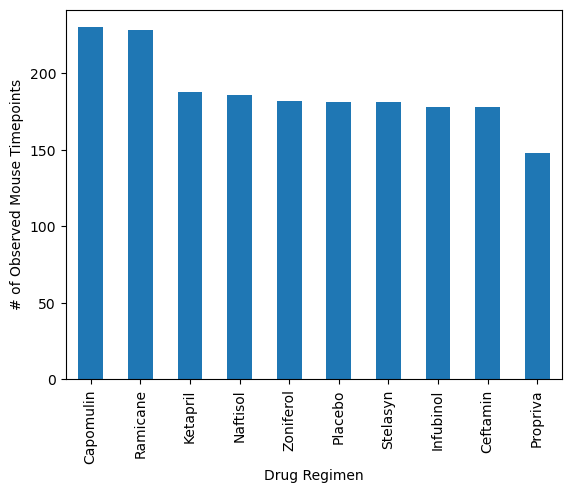

<Figure size 640x480 with 0 Axes>

In [100]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = cleaned_results_df["Drug Regimen"].value_counts() # .size() works as well
drug_regimen_bar= drug_regimen_count.plot(kind="bar") #can add size and title from here as well
drug_regimen_bar.set_xlabel("Drug Regimen")
drug_regimen_bar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

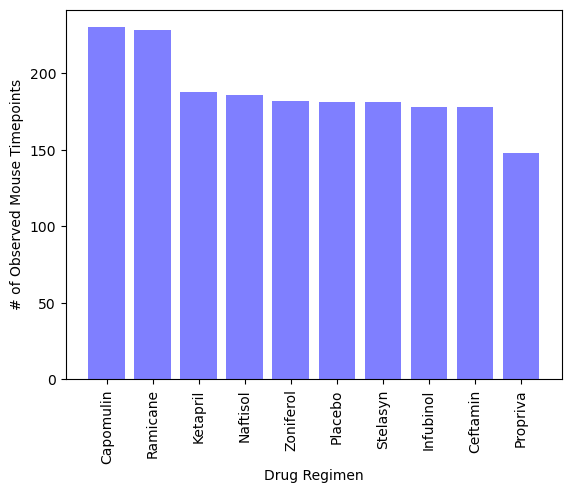

In [101]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_axis= drug_regimen_count
x_axis= np.arange(len(drug_regimen_count))
#labels = list(drug_regimen_count.index.values)
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,drug_regimen_count.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


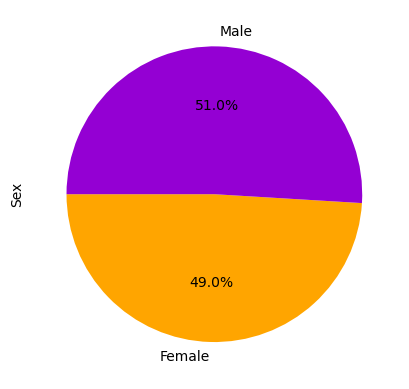

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_groups= cleaned_results_df.groupby("Sex").size()
colors= ['orange','darkviolet']
Mice_groups.plot(kind='pie',colors=colors, autopct='%1.1f%%', startangle=180)
plt.ylabel('Sex')
plt.show()


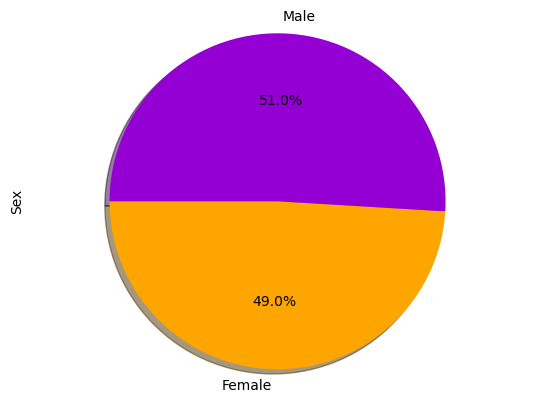

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=Mice_groups
labels=Mice_groups.index
colors= ['orange','darkviolet']
explode= (0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [104]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_max_timepoint = cleaned_results_df.groupby('Mouse ID')['Timepoint'].max()
#mouse_max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(cleaned_results_df, mouse_max_timepoint, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df= final_tumor_volume_df.reset_index()
final_tumor_volume_df


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,45,22.050126,1
1,1,s185,Capomulin,Female,3,17,45,23.343598,1
2,2,x401,Capomulin,Female,16,15,45,28.484033,0
3,3,m601,Capomulin,Male,22,17,45,28.430964,1
4,4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
243,243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,244,z435,Propriva,Female,12,26,10,48.710661,0
245,245,z581,Infubinol,Female,24,25,45,62.754451,3
246,246,z795,Naftisol,Female,13,29,45,65.741070,3


In [105]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
     subset= final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    # add subset 
     tumor_volume_data.append(subset)
    # Determine outliers using upper and lower bounds
     quartiles= subset.quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     iqr = upperq-lowerq
     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr)
    #checking for outliers (new Dataframe)
     outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
     print(treatment + "'s potential outliers:", outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


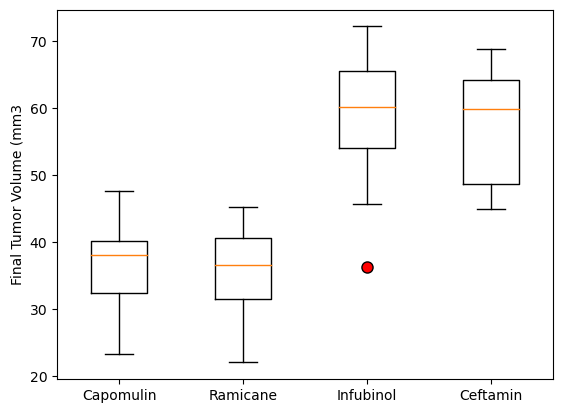

In [106]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 =plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3')
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=8) #Xpert learning Assistant
ax1.boxplot(tumor_volume_data, labels=treatments, flierprops=flierprops) #using the tuor data list we created in loop
plt.show()

#Line and Scatter Plots

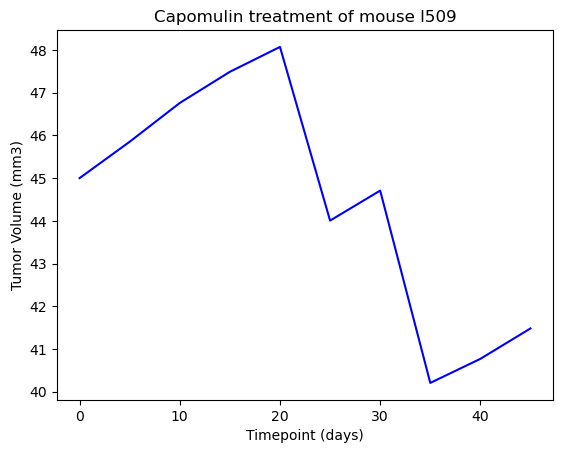

In [107]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse= cleaned_results_df.loc[cleaned_results_df['Mouse ID']=='l509',:] #filter clean data to mouse
x_axis1= mouse["Timepoint"] #grabs the timepoints data for the mouse
y_axis1= mouse["Tumor Volume (mm3)"] #grabs the Tumor volume data for the mouse
capomulin_plot= plt.plot(x_axis1, y_axis1,color="blue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [88]:
#Checking work column
#mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)']
#mouse_weight.head()
#capomulin_df=cleaned_results_df.loc[cleaned_results_df['Drug Regimen']== 'Capomulin',:]
#calculate the average for the Tumor Volume on all Mouse
#average_tumor= capomulin_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
#average_tumor.head()
#mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].first()
#mouse_weight.head()

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
Name: Weight (g), dtype: int64

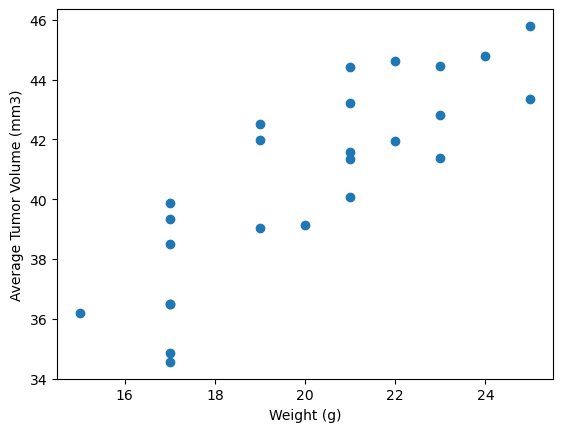

In [108]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter to only the Drug Regimen
capomulin_df=cleaned_results_df.loc[cleaned_results_df['Drug Regimen']== 'Capomulin',:]
#calculate the average for the Tumor Volume on all Mouse
average_tumor= capomulin_df.groupby("Mouse ID")['Tumor Volume (mm3)'].mean() #by mouse ID calculates all volume average for Drug Regimen for each mouse ID
mouse_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].first() #the weight for each mouse should not change so we just want one value returned. even if we used .mean () we'd get the same result
plt.scatter(mouse_weight,average_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


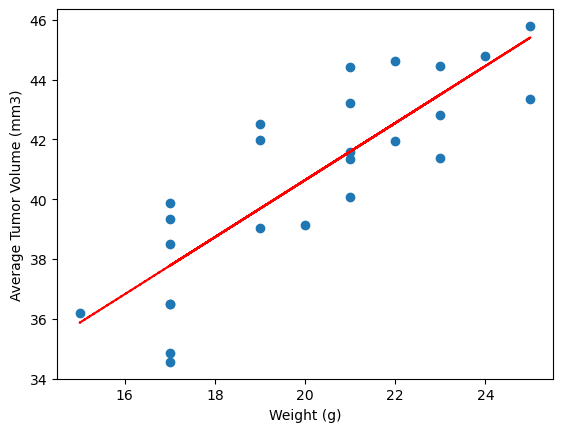

In [114]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_volume_corr= mouse_weight.corr(average_tumor) #calculate correlation between 
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor) # Perform a linear regression
regress_values = mouse_weight * slope + intercept # equation of line to calculate predicted tumor volume [y = mx + b]
plt.scatter(mouse_weight,average_tumor)
plt.plot(mouse_weight, regress_values,"r--") #plots the regression line in red with dashes format
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {weight_volume_corr:.2f}')
plt.show()
